<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Battery-Decay" data-toc-modified-id="Battery-Decay-0.1">Battery Decay</a></span></li><li><span><a href="#Collisions" data-toc-modified-id="Collisions-0.2">Collisions</a></span></li></ul></li></ul></div>

This notebook will be used to create figures for the paper. It loads data saved from the simulation which is in the data folder.

In [73]:
import os
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import pickle
from scipy import stats as st

## A small hack to make sure we are in the correct folder
cwd = os.getcwd()
folder_name = os.path.basename(cwd)
if folder_name != 'uas-package':
    os.chdir('../')

sns.set()
%matplotlib inline

## Battery Decay

This section will create a graph that shows the battery decay per meter of flight travel.

In [36]:
eta = .6  # 60%
v_speed = 7.5 #m/s
wt_pizza = 1 #kg
flight_time_unladen = 35 #min
flight_time_max = 16 #min
max_weight = 6 #kg

In [37]:
# linear interopolation of weight and flight time
weights = np.linspace(0, max_weight, 7)
flight_time_hover = np.linspace(flight_time_unladen, flight_time_max, 7)

# battery ineffecieny of travel vs hover
flight_time_travel = flight_time_hover * eta

# max range for the given weight when flying at optimal speed
flight_distance_travel = flight_time_travel * v_speed * 60 

# max_dist_unladen = flight_distance_travel[0]

# Finally compute the battery decay, units = batttery % / meter
battery_decay = 100 / flight_distance_travel

array([0.01058201, 0.01163467, 0.0129199 , 0.01452433, 0.01658375,
       0.01932367, 0.02314815])

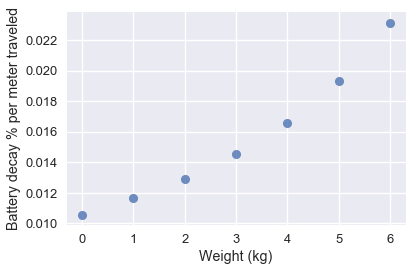

In [39]:
sns.set_context("talk")
ax = sns.regplot(weights, battery_decay,  fit_reg=False)
ax.set(xlabel='Weight (kg)', ylabel='Battery decay % per meter traveled')
plt.savefig('imgs/battery_decay.png', bbox_inches='tight')
plt.tight_layout()
battery_decay

## Collisions

This section will create histograms and generate confidence intervals of the mean number of collisions.

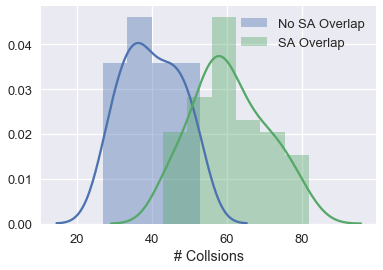

In [71]:
with open('data/collisions_dual.p', 'rb') as handle:
    dual = pickle.load(handle)
    dual = np.concatenate(dual,0)
with open('data/collisions_single.p', 'rb') as handle:
    single = pickle.load(handle)
    single = np.concatenate(single, 0)

ax = sns.distplot(single, kde=True, label='No SA Overlap')
sns.distplot(dual, ax=ax, kde=True, label='SA Overlap')
ax.legend()
ax.set_xlabel('# Collsions')
plt.savefig('imgs/collisions_histogram.png', bbox_inches='tight')

No SA Overlap Collisions - Mean: 40.03; SE: 1.40, CI: (37.16685114108845, 42.89981552557821)
SA Overlap Collisions - Mean: 60.75; SE: 1.27, CI: (58.20482572676555, 63.29517427323445)


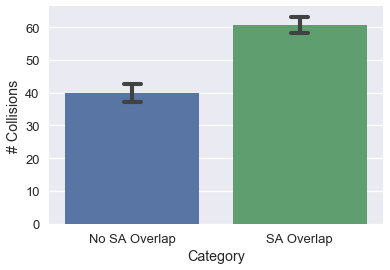

In [79]:
sns.set_context("talk")
df = pd.DataFrame(single, columns=['# Collisions'])
df['Category'] = 'No SA Overlap'

df1 = pd.DataFrame(dual, columns=['# Collisions'])
df1 ['Category'] = 'SA Overlap'

df = df.append(df1)


mean = np.mean(single)
CI = st.t.interval(0.95, len(single)-1, loc=mean, scale=st.sem(single))

print('No SA Overlap Collisions - Mean: {:.2f}; SE: {:.2f}, CI: {}'.format(mean, st.sem(single), CI))

mean = np.mean(dual)
CI = st.t.interval(0.95, len(dual)-1, loc=mean, scale=st.sem(dual))

print('SA Overlap Collisions - Mean: {:.2f}; SE: {:.2f}, CI: {}'.format(mean, st.sem(dual), CI))

ax = sns.barplot(x="Category", y="# Collisions", data=df, capsize=.1)
plt.savefig('imgs/collisions_barplot.png', bbox_inches='tight')